In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import datetime
import calendar

Reading all the files in the folder and merge them to create out master dataframe.

In [2]:
df=pd.read_csv("./Sales_Data/Sales_April_2019.csv")

In [3]:
files=[file for file in os.listdir("./Sales_Data/")]

In [4]:
files

['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [17]:
master=pd.DataFrame()

for file in files:
    df=pd.read_csv("./Sales_Data/"+file)
    master=pd.concat([master,df])

master.to_csv("All_merged_data.csv", index=False)

In [18]:
master=pd.read_csv("All_merged_data.csv")

In [19]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 8.6+ MB


In [20]:
master=master.dropna(how='all')

In [35]:
# This cleanup was required as during the conversion into datetime datatype we noticed that
# there were many such entries where all the values entered in the rows were the column names itself.
# thus picking any column and checking if it matches with the column name can help us eliminate them.
master=master[master['Order Date']!='Order Date']

In [22]:
master['Order Date']=master['Order Date'].apply(lambda x: (datetime.datetime.strptime(str(x), "%m/%d/%y %H:%M")))

In [23]:
master['month']=master['Order Date'].apply(lambda x:x.month)

In [24]:
master.info()
# Notice the reduction in entries.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
Order ID            185950 non-null object
Product             185950 non-null object
Quantity Ordered    185950 non-null object
Price Each          185950 non-null object
Order Date          185950 non-null datetime64[ns]
Purchase Address    185950 non-null object
month               185950 non-null int64
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 11.3+ MB


### Q1. What was the Best month for sale?

In [25]:
#Converting the columns in to apt dtypes, all above were object/string.
master['Price Each']=master['Price Each'].apply(lambda x: float(x))

In [27]:
master['Quantity Ordered']=master['Quantity Ordered'].apply(lambda x:int(x))

In [28]:
master['Order Value']=master['Quantity Ordered']*master['Price Each']

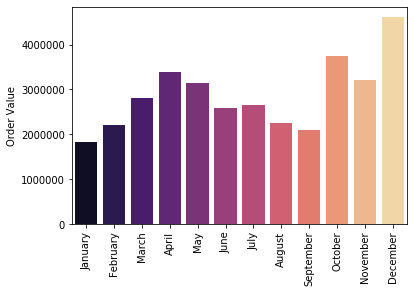

In [31]:
plt.xticks(rotation=90)
sns.barplot(x=calendar.month_name[1:13],y=master.groupby('month').sum()['Order Value'],palette='magma')

### Q2. Which City had the most sales?

In [32]:
def find_city(y):
    return(y[y.find('St,')+4 : y.find(',',y.find('St,')+4)])
#alternatively can use: y.split(',')[1] 
## this means it will split the string based on ',' the grab the [1]th element frmo the list of split substrings

In [33]:
master['Cities']=master['Purchase Address'].apply(lambda x: find_city(x))

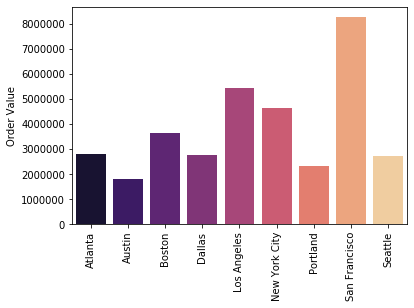

In [34]:
plt.xticks(rotation=90)
sns.barplot(x=np.sort(master['Cities'].unique()),y=master.groupby('Cities').sum()['Order Value'],palette='magma')

In [23]:
master.groupby('Cities').sum()

,Quantity Ordered,Price Each,month,Order Value
Cities,,,,
Atlanta,16602,2.779908e+06,104794,2.795499e+06
Austin,11153,1.809874e+06,69829,1.819582e+06
Boston,22528,3.637410e+06,141112,3.661642e+06
Dallas,16730,2.752628e+06,104620,2.767975e+06
Los Angeles,33289,5.421435e+06,208325,5.452571e+06
New York City,27932,4.635371e+06,175741,4.664317e+06
Portland,14053,2.307747e+06,87765,2.320491e+06
San Francisco,50239,8.211462e+06,315520,8.262204e+06
Seattle,16553,2.733296e+06,104941,2.747755e+06


There can be a possibility that multiple cities are named the same, and we have grouped them as one.<br>
To solve this we can grab the state along with the city names while parsing the address column.

### Q3. What would be a good time to display advertisement to maximise purchases.



To address this we are trying to aggregate the sales volume and value over all the hours of the day.

In [38]:
master['Hour']=master['Order Date'].apply(lambda x:x.hour)

In [39]:
master.groupby('Hour').sum()

,Quantity Ordered,Price Each,month,Order Value
Hour,,,,
0,4428,709296.70,27554,713721.27
1,2619,458490.00,16657,460866.88
2,1398,233833.64,8507,234851.44
3,928,144726.42,5904,145757.89
4,937,162058.18,6148,162661.01
5,1493,229621.21,9301,230679.82
6,2810,445000.11,17539,448113.00
7,4556,740568.11,28850,744854.12
8,7002,1185970.62,43626,1192348.97


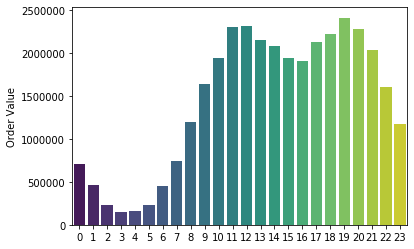

In [40]:
sns.barplot(x=np.sort(master['Hour'].unique()),y=master.groupby('Hour').sum()['Order Value'],palette='viridis')

In the above problem, getting the median or similar sales value may be more useful. 
we can further aggregate them on a heat map on a weekly basis.

### Q4. What products are most often sold together?
As usual there are multiple ways to answer this question, but in order to brnig in some sort of vizualization into the solution we will create a heat map of all the products sold together. 

In [26]:
master['Product'].value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

In [53]:
186850-master['Order ID'].nunique()
# This is basically a count of all the orders that had multiple items, as we are only concerned with those. 

8413

In [54]:
# This is a table of all the unique order ids in the master data and their respective frequency.
counts= pd.DataFrame(master['Order ID'].value_counts())

In [56]:
counts.reset_index(inplace=True)
counts.rename(columns={'Order ID': 'Frequency'},inplace=True)

In [57]:
counts.head()

,index,Frequency
0,160873,5
1,277875,4
2,312407,4
3,178158,4
4,226625,4


In [46]:
# We created a seperate dataframe with all the oders with more than one item.
# Not the most elegant code, but hey it works!
# Running this will take time, as will any operation in python which involves iteration over all the rows.
# Looks more like java rather than python.
corder=pd.DataFrame()
for i in counts[counts['Order ID']>1]['index']:
    corder=pd.concat([corder,master[master['Order ID']==i]])

In [47]:
corder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14649 entries, 54336 to 77563
Data columns (total 10 columns):
Order ID            14649 non-null object
Product             14649 non-null object
Quantity Ordered    14649 non-null int64
Price Each          14649 non-null float64
Order Date          14649 non-null datetime64[ns]
Purchase Address    14649 non-null object
month               14649 non-null int64
Order Value         14649 non-null float64
Cities              14649 non-null object
Hour                14649 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 1.2+ MB


In [58]:
corder.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,Order Value,Cities,Hour
54336,160873,iPhone,1,700.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,700.00,San Francisco,10
54337,160873,Lightning Charging Cable,1,14.95,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,14.95,San Francisco,10
54338,160873,Apple Airpods Headphones,1,150.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,150.00,San Francisco,10
54339,160873,Wired Headphones,1,11.99,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,11.99,San Francisco,10
54340,160873,Google Phone,1,600.00,2019-02-10 10:24:00,"702 River St, San Francisco, CA 94016",2,600.00,San Francisco,10


In [60]:
#Fixing the above index issue.
corder.reset_index(inplace=True)
corder.drop('index',axis=1,inplace=True)

In [62]:
corder['Product'].unique()

array(['iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones',
       'Wired Headphones', 'Google Phone', 'USB-C Charging Cable',
       '27in FHD Monitor', 'Bose SoundSport Headphones',
       '34in Ultrawide Monitor', 'Vareebadd Phone',
       'AA Batteries (4-pack)', 'AAA Batteries (4-pack)', 'Flatscreen TV',
       'Macbook Pro Laptop', '27in 4K Gaming Monitor', '20in Monitor',
       'ThinkPad Laptop', 'LG Dryer', 'LG Washing Machine'], dtype=object)

**What we do below is, we create a 19x19 matrix, it is the umber of unique products sold. we will try to populate the matrix with the fequency of each product sold with the other one.<br>
To do this, we pick each unique element and add an unit to the corresponding matrix in order to count the number of times the other product was sold along with it.**

In [63]:
%time
m=np.zeros([19,19])
product=corder['Product'].unique()
for i in range(19):
    for j in range (19):
        #if i>j:
            ids=corder[corder['Product']==product[i]]['Order ID']
            for k in ids:
                if (product[j] in corder[(corder['Order ID']==k)]['Product'].values):
                    m[i][j]=m[i][j]+1
                         

CPU times: user 6 µs, sys: 1 µs, total: 7 µs
Wall time: 11 µs


In [64]:
print(m)

[[1.867e+03 1.012e+03 3.730e+02 4.620e+02 9.000e+00 2.900e+01 2.000e+00
  1.200e+01 1.300e+01 7.000e+00 3.200e+01 3.100e+01 1.000e+01 6.000e+00
  9.000e+00 3.000e+00 7.000e+00 0.000e+00 2.000e+00]
 [1.014e+03 1.827e+03 1.160e+02 1.290e+02 2.800e+01 1.000e+02 3.600e+01
  7.200e+01 3.300e+01 4.000e+00 1.060e+02 8.000e+01 2.200e+01 2.100e+01
  3.400e+01 2.600e+01 2.000e+01 3.000e+00 6.000e+00]
 [3.730e+02 1.160e+02 9.740e+02 1.000e+02 2.100e+01 6.300e+01 2.400e+01
  5.000e+01 1.400e+01 1.200e+01 7.000e+01 8.100e+01 1.300e+01 1.900e+01
  2.200e+01 1.300e+01 1.600e+01 3.000e+00 1.000e+00]
 [4.620e+02 1.290e+02 1.000e+02 1.674e+03 4.230e+02 2.040e+02 2.200e+01
  7.400e+01 2.800e+01 1.490e+02 8.300e+01 8.600e+01 1.100e+01 2.000e+01
  2.900e+01 1.900e+01 1.400e+01 1.000e+00 4.000e+00]
 [9.000e+00 2.800e+01 2.100e+01 4.220e+02 1.639e+03 9.970e+02 8.000e+00
  2.280e+02 5.000e+00 5.000e+00 2.500e+01 2.200e+01 4.000e+00 7.000e+00
  6.000e+00 4.000e+00 6.000e+00 1.000e+00 1.000e+00]
 [2.900e+01 1.0

In [65]:
#A quick way to check if the above code did the desired job, the output should be the [1,1] element of the matrix.
t=0
ids=corder[corder['Product']==product[0]]['Order ID']
for k in ids:
    if (product[0] in corder[(corder['Order ID']==k)]['Product'].values):
         t=t+1
print(t)

1867


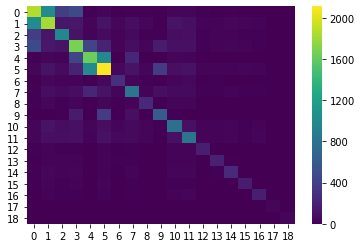

In [66]:
sns.heatmap(m,cmap='viridis')

Again, there are multiple ways to do this.<br>
Moreover there are multiple optimizationswe can do to the above<br>
Like, the diagonal are the bightest, but irrelevant, we can fill only half the map etc.